<a href="https://colab.research.google.com/github/salv0304/Machine_Learning/blob/main/03_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Would you survive Titanic?

RMS Titanic was a British passenger ship that sank in the North
Atlantic Ocean in the early morning hours of April 15, 1912, after
striking an iceberg during her maiden voyage.  The majority of its
passengers died in the accident.  As we will discover, not all of them
had the same chance to survive.

Data about 887 passengers have been collected and randomly divided
into a training and a test set.  The training set includes 710 samples
and is stored in the file `titanic-train.txt`, while the test set
is composed of 177 cases and is stored in `titanic-test.txt`.
Each row in the files represents a different passenger, and reports the
following features:
- the ticket class (1st, 2nd or 3rd);
- sex ($0 \to$ male, $1 \to$ female);
- age, in years;
- number of siblings and spouses aboard;
- number of parents and children aboard;
- the passenger fare.

The last column reports whether the passenger survived (1) or not (0).
The files can be obtained by executing the following cell.

In [ ]:
!wget -q -O titanic-train.txt https://pastebin.com/raw/LDhY3ZTN
!wget -q -O titanic-test.txt https://pastebin.com/raw/zGsE0ZJ6
!ls *.txt

titanic-test.txt  titanic-train.txt


Training data is then loaded and converted to tensors of features and class labels:

In [ ]:
import torch
import matplotlib.pyplot as plt


f = open("titanic-train.txt")
data = [float(x) for x in f.read().split()]
f.close()

data = torch.tensor(data).view(-1, 7) # Arrange it as a matrix with n rows and 7 columns
X = data[:, :6]
Y = data[:, 6].long()

#6 features, 1 output
print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

torch.Size([710, 6]) torch.float32
torch.Size([710]) torch.int64


## Training a model

Define and train a logistic regression model for the Titanic data. First, define the inference function computing the probability estimates that input features belong to class 1:

In [ ]:
def logreg_inference(w, b, X):
    z = X @ w + b
    p = 1 / (1+torch.exp(-z)) #or easily p = torch.sigmoid(z)
    return p

Then write the training loop. Remember the the main steps:
1. outside the loop define the parameters of the model, and the optimizer (use `torch.optim.SGD`).
2. inside the loop, compute the loss and use the optimizer to update the parameters.

In [ ]:
#Defining the cross entropy
def cross_entropy(Y, p):
    p = p.clamp(0.001, 0.999) #restricting values of the function with clamp
    return -(Y*torch.log(p) + (1-Y)*torch.log(1-p)).mean()


In [ ]:
STEPS = 50000
LR = 0.002

#Initializing the parameters
w = torch.zeros(6, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#Introducing the SGD optimizer
optimizer = torch.optim.SGD([w, b], lr = LR)

#Defining lists for plotting accuracy / loss vs steps
steps = []
losses = []
accuracies = []

for step in range(STEPS):
    optimizer.zero_grad()

    #Compute the loss for the current values of w and b...
    p = logreg_inference(w, b, X)
    loss = cross_entropy(Y, p)
    accuracy = ((p > 0.5).long() == Y).float().mean() #(p > 0.5) return a boolean tensor; then convert and compare to Y

    #compute the gradients
    loss.backward()

    #Alternatively, using a built-in function
    #loss_fun = torch.nn.BCELoss()
    #loss = loss_fun(p, Y.float())

    #Update the parameters
    optimizer.step()

    #Populating lists
    steps.append(step)
    losses.append(loss.item())
    accuracies.append(accuracy.item())

    #Diagnostic
    if step % 1000 == 0:
        print(step, loss.item(), accuracy.item())


0 0.6931472420692444 0.6211267709732056
1000 0.5796275734901428 0.6985915303230286
2000 0.55601966381073 0.7183098793029785
3000 0.5375592112541199 0.7295774817466736
4000 0.522493839263916 0.7436619997024536
5000 0.5100774765014648 0.7464788556098938
6000 0.4997774660587311 0.7704225182533264
7000 0.4911835193634033 0.7732394337654114
8000 0.4839745759963989 0.780281662940979
9000 0.4778969883918762 0.783098578453064
10000 0.4727487862110138 0.800000011920929
11000 0.46836796402931213 0.8126760721206665
12000 0.4646238386631012 0.8084506988525391
13000 0.4614102244377136 0.8084506988525391
14000 0.4586406946182251 0.8070422410964966
15000 0.45624399185180664 0.8070422410964966
16000 0.45416170358657837 0.8042253255844116
17000 0.45234546065330505 0.8042253255844116
18000 0.45075511932373047 0.8028169274330139
19000 0.44935715198516846 0.8014084696769714
20000 0.44812342524528503 0.800000011920929
21000 0.44703054428100586 0.7985915541648865
22000 0.4460587203502655 0.800000011920929
2

Modify the code above to make a list with loss values and training steps
then execute the next cell to plot it.

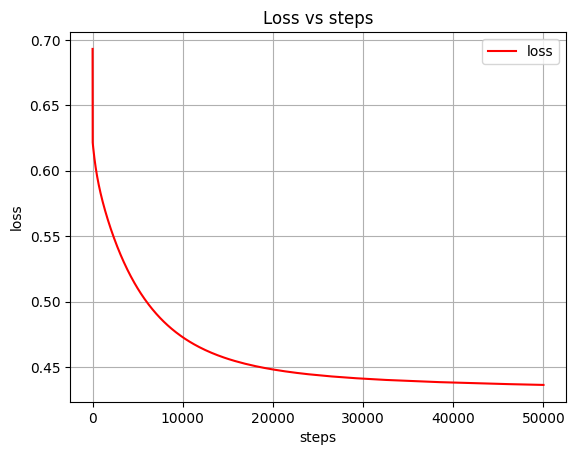

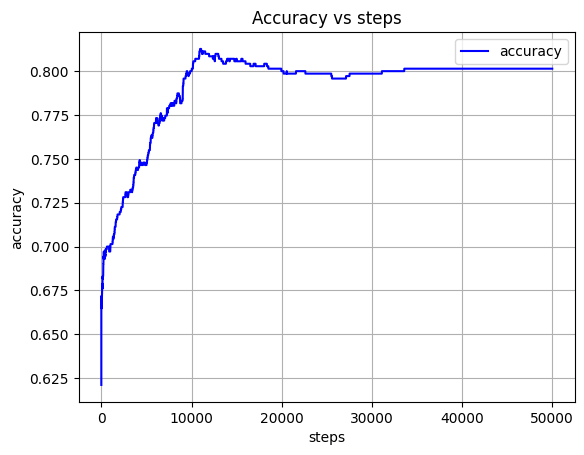

In [ ]:
#Plotting

plt.figure()
plt.plot(steps, losses, label = "loss", c = "red")
plt.xlabel("steps")
plt.ylabel("loss")
plt.legend()
plt.title("Loss vs steps")
plt.grid(True)

plt.figure()
plt.plot(steps, accuracies, label = 'accuracy', c ='blue')
plt.legend()
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.title("Accuracy vs steps")
plt.grid(True)

Experiment with the code and use the plots to answer the following questions:
1. Which is a good value for the learning rate?
2. How many iterations are required to converge?

## Analyze the model

Modify the script so that you can answer to the questions.

Q1: What would be your probability to survive?  (Make a guess about the ticket class, the fare etc.)

In [ ]:
x_0 = torch.tensor([3, 0, 23, 0, 0, 50.])
y_pred = logreg_inference(w, b, x_0)
print(y_pred)

tensor([0.1425], grad_fn=<MulBackward0>)


Q2: What is the *training accuracy* of the trained model?

In [ ]:
#Calculating the accuracy
accuracy = ((p > 0.5).long() == Y).float().mean()
print(accuracy)

tensor(0.8014)


Q3: Looking at the learned weights, how the individual features
  influence the probability of surviving?

In [ ]:
print(w)

tensor([-0.7979,  2.6717, -0.0261, -0.2857, -0.0919,  0.0053],
       requires_grad=True)


Q4: What kind of passengers was most likely to survive?  And what
  kind to to die?

Women in first class

In [ ]:
p = logreg_inference(w, b, X)
print(X[p.argmin(0), :])
print(X[p.argmax(0), :])

tensor([ 3.0000,  0.0000, 20.0000,  8.0000,  2.0000, 69.5500])
tensor([  1.0000,   1.0000,  35.0000,   0.0000,   0.0000, 512.3292])


Q5: Draw a scatter plot showing the distribution of the two classes
  in the plane defined by the two most influential features.  Comment
  the plot.

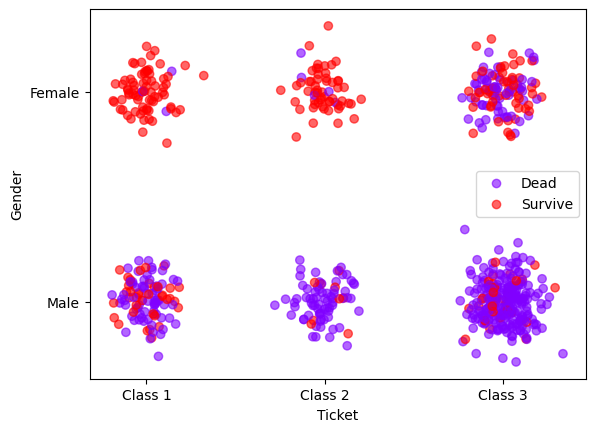

In [ ]:
#Isolating the features
gender = data[:, 1]
ticket = data[:, 0]

#Let's add some noise
noisy_ticket = ticket + torch.randn_like(ticket) * 0.1
noisy_gender = gender + torch.randn_like(gender) * 0.1

#Plotting
plt.figure()
scatter = plt.scatter(noisy_ticket, noisy_gender, c = Y, cmap = 'rainbow', alpha = 0.6)
plt.xlabel("Ticket")
plt.ylabel("Gender")
plt.yticks([0, 1])  # Set the tick locations
plt.gca().set_yticklabels(['Male', 'Female'])  # Set the tick labels
plt.xticks([1, 2, 3])  # Set the tick locations
plt.gca().set_xticklabels(['Class 1', 'Class 2', 'Class 3'])  # Set the tick labels
labels = ['Dead', 'Survive']  #Define labels for the legend
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.show()

## Evaluate the script

Load the test set in the `Xtest` and `Ytest` tensors. Then, answer the questions.

In [ ]:
#Loading test dataset
g = open("titanic-test.txt")
test_data = [float(x) for x in g.read().split()]
g.close()

test_data = torch.tensor(test_data).view(-1, 7)
Xtest = test_data[:, :6]
Ytest = test_data[:, 6].long()

#6 features, 1 output
print(Xtest.shape, Xtest.dtype)
print(Ytest.shape, Ytest.dtype)

torch.Size([177, 6]) torch.float32
torch.Size([177]) torch.int64


Q6: what is the *test accuracy* of the model?

In [ ]:
p = logreg_inference(w, b, Xtest)
test_accuracy = ((p > 0.5).long() == Ytest).float().mean()
print(test_accuracy)

tensor(0.7910)


Q7: Is the model overfitting or underfitting the training set?

Q8: How can you increase the performance of the model?

As a first intuitive approach, let's try to simply reduce the number of features, ignoring the ones that have low weights.

In [ ]:
print(w)

tensor([-0.7979,  2.6717, -0.0261, -0.2857, -0.0919,  0.0053],
       requires_grad=True)


In [ ]:
#Reducing the number of features
X = data[:, :4]

#Training with the "new" list of features
STEPS = 50000
LR = 0.002

#Initializing the parameters
w = torch.zeros(4, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#Introducing the SGD optimizer
optimizer = torch.optim.SGD([w, b], lr = LR)

#Defining lists for plotting accuracy / loss vs steps
steps = []
losses = []
accuracies = []

for step in range(STEPS):
    optimizer.zero_grad()

    #Compute the loss for the current values of w and b...
    p = logreg_inference(w, b, X)
    loss = cross_entropy(Y, p)
    accuracy = ((p > 0.5).long() == Y).float().mean() #(p > 0.5) return a boolean tensor; then convert and compare to Y

    #compute the gradients
    loss.backward()

    #Alternatively, using a built-in function
    #loss_fun = torch.nn.BCELoss()
    #loss = loss_fun(p, Y.float())

    #Update the parameters
    optimizer.step()

    #Populating lists
    steps.append(step)
    losses.append(loss.item())
    accuracies.append(accuracy.item())

    #Diagnostic
    if step % 1000 == 0:
        print(step, loss.item(), accuracy.item())

0 0.6931472420692444 0.6211267709732056
1000 0.6054877042770386 0.6197183132171631
2000 0.5742030143737793 0.705633819103241
3000 0.5504968166351318 0.7323943376541138
4000 0.5317301750183105 0.7732394337654114
5000 0.5166811943054199 0.7929577231407166
6000 0.504511296749115 0.794366180896759
7000 0.49459633231163025 0.800000011920929
8000 0.48646047711372375 0.800000011920929
9000 0.4797380864620209 0.8225352168083191
10000 0.4741459786891937 0.814084529876709
11000 0.46946343779563904 0.814084529876709
12000 0.46551719307899475 0.8070422410964966
13000 0.46217080950737 0.8014084696769714
14000 0.45931577682495117 0.800000011920929
15000 0.45686545968055725 0.800000011920929
16000 0.4547503888607025 0.7985915541648865
17000 0.45291420817375183 0.7985915541648865
18000 0.4513113498687744 0.7985915541648865
19000 0.44990450143814087 0.800000011920929
20000 0.44866302609443665 0.8014084696769714
21000 0.44756177067756653 0.8014084696769714
22000 0.4465797245502472 0.8014084696769714
230

In [ ]:
#Test accuracy
Xtest = test_data[:, :4]
Ytest = test_data[:, 6].long()

p = logreg_inference(w, b, Xtest)
test_accuracy = ((p > 0.5).long() == Ytest).float().mean()
print(test_accuracy)

tensor(0.7740)


Lower! This approach doesn't improve the original result

##Regularization

Next approach could be L2 regularization

In [ ]:
# Cross entropy with L2 regularization
def cross_entropy(Y, p, w, lambda_l2=0.01):
    p = p.clamp(0.001, 0.999)
    ce_loss = -(Y * torch.log(p) + (1 - Y) * torch.log(1 - p)).mean()
    l2_penalty = lambda_l2 * (w ** 2).sum()
    return ce_loss + l2_penalty

In [ ]:
X = data[:, :6]
Y = data[:, 6].long()

In [ ]:
STEPS = 50000
LR = 0.002

#Initializing the parameters
w = torch.zeros(6, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#Introducing the SGD optimizer
optimizer = torch.optim.SGD([w, b], lr = LR)

#Defining lists for plotting accuracy / loss vs steps
steps = []
losses = []
accuracies = []

for step in range(STEPS):
    optimizer.zero_grad()

    #Compute the loss with L2 regularization for the current values of w and b...
    p = logreg_inference(w, b, X)
    loss = cross_entropy(Y, p, w, lambda_l2= 0.01)
    accuracy = ((p > 0.5).long() == Y).float().mean() #(p > 0.5) return a boolean tensor; then convert and compare to Y

    #compute the gradients
    loss.backward()

    #Alternatively, using a built-in function
    #loss_fun = torch.nn.BCELoss()
    #loss = loss_fun(p, Y.float())

    #Update the parameters
    optimizer.step()

    #Populating lists
    steps.append(step)
    losses.append(loss.item())
    accuracies.append(accuracy.item())

    #Diagnostic
    if step % 1000 == 0:
        print(step, loss.item(), accuracy.item())

0 0.6931472420692444 0.6211267709732056
1000 0.5810429453849792 0.6971830725669861
2000 0.5600671172142029 0.7183098793029785
3000 0.5449231863021851 0.7281690239906311
4000 0.5334996581077576 0.7380281686782837
5000 0.5247931480407715 0.7464788556098938
6000 0.5181111693382263 0.7563380002975464
7000 0.5129503011703491 0.7704225182533264
8000 0.508939802646637 0.7732394337654114
9000 0.5058043599128723 0.780281662940979
10000 0.5033378005027771 0.780281662940979
11000 0.5013846755027771 0.7859154939651489
12000 0.49982720613479614 0.7816901206970215
13000 0.4985760748386383 0.7985915541648865
14000 0.49756261706352234 0.8014084696769714
15000 0.49673423171043396 0.8014084696769714
16000 0.49605050683021545 0.8070422410964966
17000 0.49548009037971497 0.8098591566085815
18000 0.494998961687088 0.8098591566085815
19000 0.49458810687065125 0.8056337833404541
20000 0.49423301219940186 0.8084506988525391
21000 0.49392232298851013 0.8098591566085815
22000 0.4936472177505493 0.80985915660858

In [ ]:
print(w)

tensor([-0.6125,  1.7378, -0.0260, -0.2299, -0.0129,  0.0064],
       requires_grad=True)


In [ ]:
#Test accuracy
Xtest = test_data[:, :6]
Ytest = test_data[:, 6].long()


p = logreg_inference(w, b, Xtest)
test_accuracy = ((p > 0.5).long() == Ytest).float().mean()
print(test_accuracy)

tensor(0.7910)


## Homework assignement

Prepare a report of one or two pages with the answers to the questions
(include a short comment for each question).  The report must be in
the PDF format.  Include your name in the report and conclude the
document with the following statement: ``I affirm that this report is
the result of my own work and that I did not share any part of it with
anyone else except the teacher.''

Make a ZIP archive with the report and the PDF of the notebook you used (with all the outputs) and and upload it on the course website.
